In [2]:
import gpflow
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../')
from GPPref import mean_func
plt.style.use('ggplot')
%matplotlib inline

/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


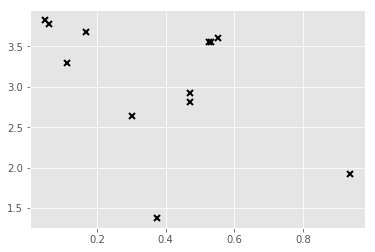

In [3]:
N = 12
X = np.random.rand(N,1)
Y = np.sin(12*X) + 0.66*np.cos(25*X) + np.random.randn(N,1)*0.1 + 3
plt.plot(X, Y, 'kx', mew=2)

In [4]:
k = gpflow.kernels.Matern52(1)
meanf = mean_func.Parabola(1,0)
m = gpflow.gpr.GPR(X, Y, kern=k, mean_function=meanf)

In [23]:
m.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m.mean_function.A.prior = gpflow.priors.Gaussian(0., 10.)
m.mean_function.mu.prior = gpflow.priors.Gaussian(0., 1.)
m

Name,values,prior,constraint
name.kern.lengthscales,[1.],"Ga([1.],[1.])",+ve
name.kern.variance,[1.],"Ga([1.],[1.])",+ve
name.likelihood.variance,[1.],"Ga([1.],[1.])",+ve
name.mean_function.A,[18.76306366],"N([0.],[10.])",(none)
name.mean_function.mu,[0.],"N([0.],[1.])",(none)


In [24]:
mm = []
for i in xrange(1000):
    m.mean_function.A.randomize()
    a = m.mean_function.A.value
    print a
    mm.append(a)

[2.22537286]
[-3.96916795]
[2.41150991]
[-6.11305134]
[1.96885139]
[-0.87969633]
[3.75650642]
[-0.82641455]
[0.49790631]
[4.15619542]
[0.24049096]
[-1.91795316]
[0.33192689]
[1.61007417]
[-0.55151339]
[-6.22431229]
[2.52241802]
[0.41504669]
[-1.64362423]
[2.46787679]
[-2.54292019]
[3.59951687]
[-2.90246146]
[6.37175946]
[2.31749292]
[0.74872836]
[-6.73783414]
[-1.48461177]
[5.3006404]
[-0.86413246]
[-1.002314]
[-1.61860254]
[-1.66290584]
[3.42327533]
[-0.59185724]
[-2.44547679]
[3.77673837]
[-4.19456111]
[2.90353307]
[-1.6571688]
[0.95118192]
[2.01778123]
[-3.84150525]
[0.85190676]
[-1.37786137]
[1.4093433]
[4.13474021]
[2.41887103]
[-7.74536657]
[-4.13478885]
[1.22240939]
[4.51864933]
[4.63961675]
[-4.68327101]
[-5.48040027]
[5.23412799]
[1.8369253]
[-4.95223795]
[1.97081032]
[-4.96431255]
[-0.79824977]
[-0.41912927]
[-4.61453563]
[-2.75916282]
[-1.29934942]
[0.4367027]
[-0.74440948]
[6.58615379]
[5.17792821]
[4.83245663]
[-3.41249223]
[3.1662605]
[0.84522842]
[-1.53380116]
[0.4870489

In [25]:
np.max(np.array(mm))

10.806793711415832

In [28]:
?gpflow.priors.LogNormal